In [1]:
import ownership_curve as oc

In [2]:
own_df = oc.UpdateOwnershipDB()

In [3]:
own_df['Delta'] = own_df['Own.{0}'.format(oc.date_string)] - own_df['Own.{0}'.format(oc.last_week)]
own_df_sort = own_df.sort_values(by = ['Delta'])
highest_climbers = list(own_df_sort[-10:]['Player'])
biggest_fallers = list(own_df_sort[:10]['Player'])

In [4]:
print(highest_climbers)

['Jarren Duran ', 'Nick Senzel ', 'Devin Smeltzer ', 'Paul Sewald ', 'Yandy Diaz ', 'Johnny Cueto ', 'Jose Urquidy ', 'Isaac Paredes ', 'Spencer Strider ', 'Tyler Wells ']


In [5]:
print(biggest_fallers)

['Anthony DeSclafani ', 'Mitch Garver ', 'Kyle Farmer ', 'Chris Taylor ', 'Brendan Donovan ', 'Michael Wacha ', 'Thairo Estrada ', 'Rich Hill ', 'Graham Ashcraft ', 'Roansy Contreras ']


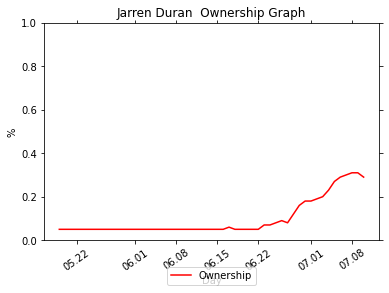

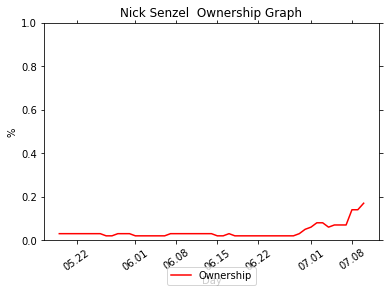

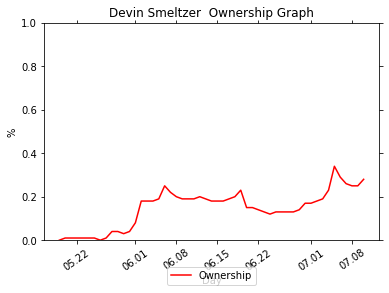

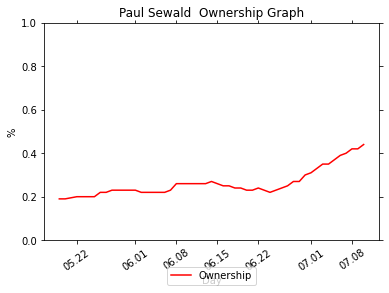

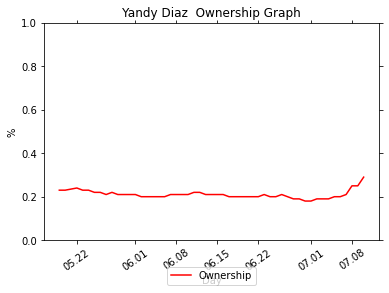

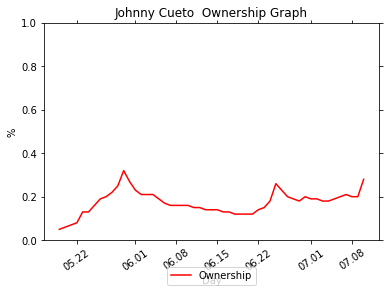

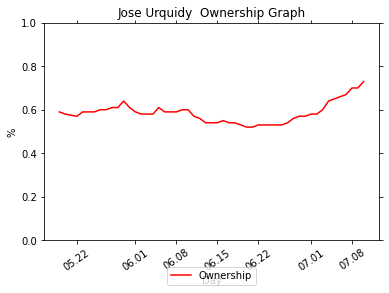

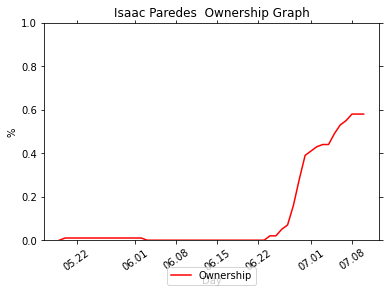

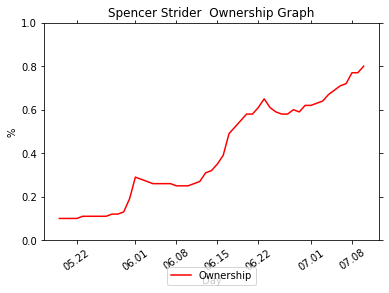

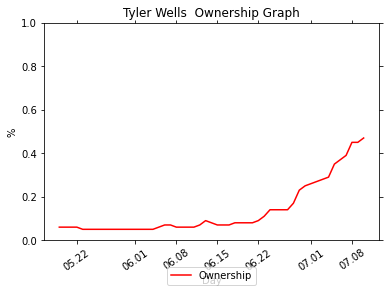

In [6]:
graphs = []
for player in highest_climbers:
     oc.GraphPlayer(own_df, player)
     new_graph = 'graphs/{}.png'.format(player)
     oc.plt.savefig(new_graph)
     im1 = oc.Image.open(new_graph)
     graphs.append(im1)
    
oc.get_concat_h(graphs).save('graphs/highest_climbers.jpg')

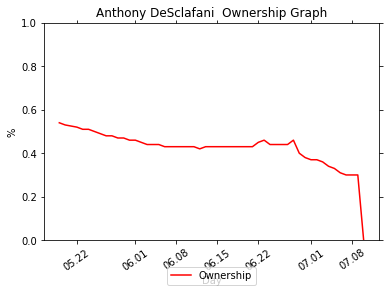

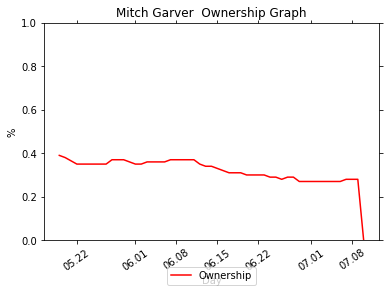

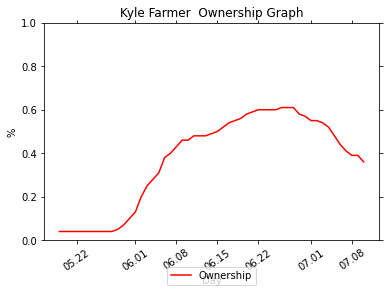

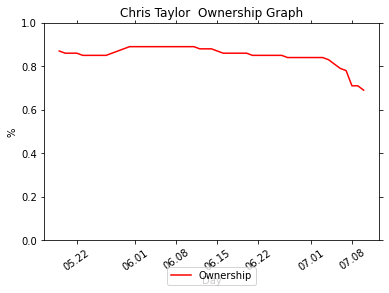

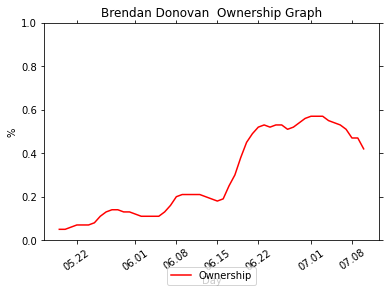

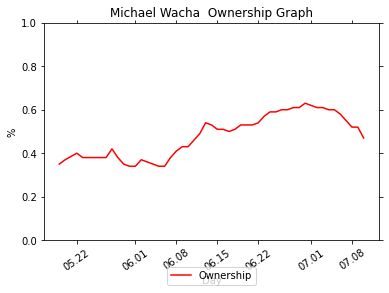

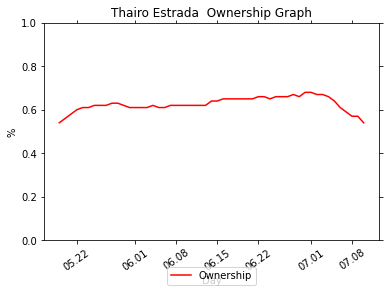

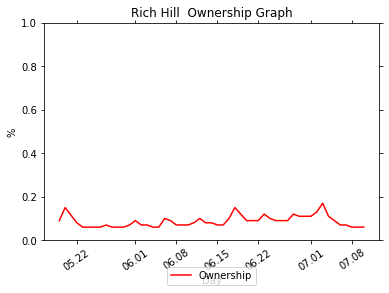

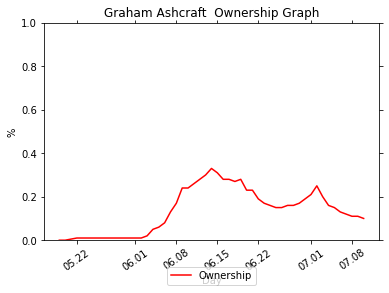

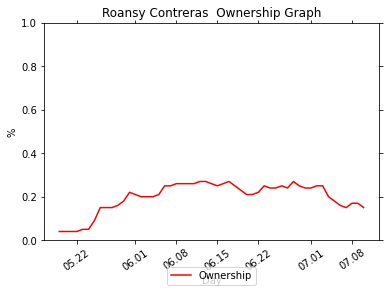

In [7]:
graphs = []
for player in biggest_fallers:
     oc.GraphPlayer(own_df, player)
     new_graph = 'graphs/{}.png'.format(player)
     oc.plt.savefig(new_graph)
     im1 = oc.Image.open(new_graph)
     graphs.append(im1)
    
oc.get_concat_h(graphs).save('graphs/highest_climbers.jpg')

In [8]:
data_file = "data/fp_proj_{0}_{1}.csv"
hit_stats = oc.stat_scraping.get_fantasy_pros_stats(player_type = 'hitters')
dfHit = oc.pd.read_csv(data_file.format('hit', oc.date_string))   
dfHit_pre = oc.pd.read_csv(data_file.format('hit', '20220519')) 

dfHit = oc.lim_hit_scope(dfHit)
hit_stats = oc.lim_hit_scope(hit_stats)
hit_stats['PlayerId'] = hit_stats['PlayerId'].astype(int)
dfHit_pre = oc.lim_hit_scope(dfHit_pre)

dfHit = oc.pd.concat([dfHit, hit_stats])
dfHit = dfHit.groupby(['Player', 'PlayerId'], as_index = False).sum()
dfHit = dfHit.merge(dfHit_pre, how= 'left', on = ['Player', 'PlayerId'])
dfHit = dfHit.loc[dfHit['Rost_y']==dfHit['Rost_y']]

interesting_plus = []
for i in ['R+RBI_', 'HR+SB_', 'H_']:
    dfHit[i+'Delta'] = dfHit[i+'x'] - dfHit[i+'y']
    dfHit = dfHit.sort_values(by = [i+'Delta'])
    highest_climbers = list(dfHit[-5:]['Player'])
    interesting_plus.extend(highest_climbers)

interesting_plus = list(set(interesting_plus))
print(interesting_plus)

['Thairo Estrada ', 'Luis Gonzalez ', 'Jon Berti ', 'Yonathan Daza ', 'Julio Rodriguez ', 'Brendan Donovan ', 'Owen Miller ', 'Franchy Cordero ', 'Aaron Judge ', 'Brandon Drury ', 'Andrew Velazquez ']


Thairo Estrada , Luis Gonzalez , Jon Berti , Yonathan Daza , Julio Rodriguez , Brendan Donovan , Owen Miller , Franchy Cordero , Aaron Judge , Brandon Drury , Andrew Velazquez , 

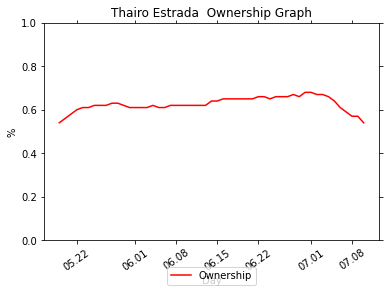

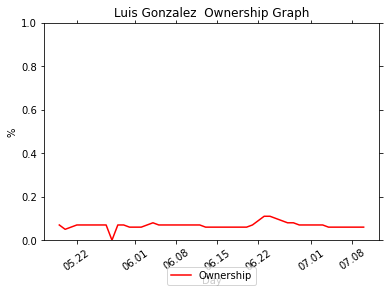

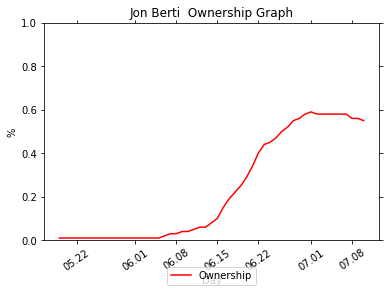

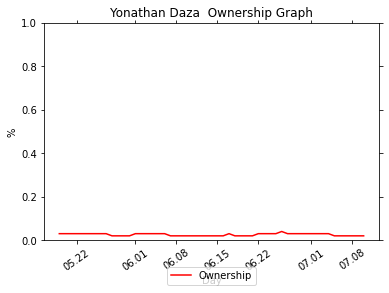

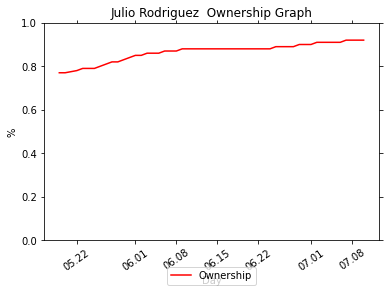

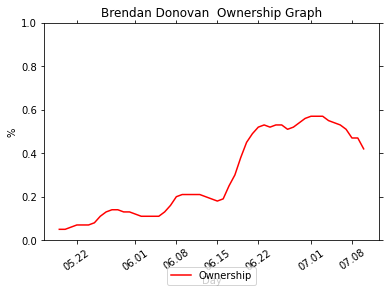

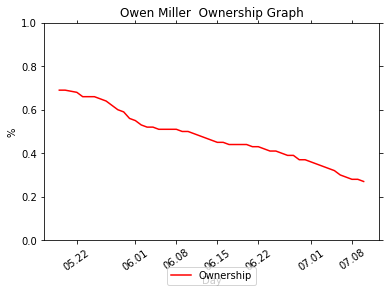

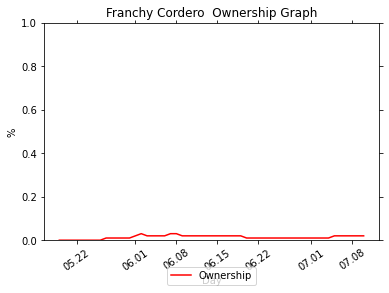

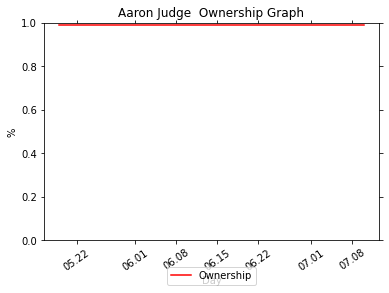

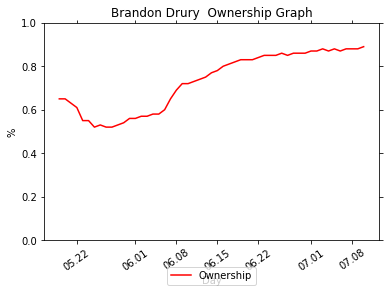

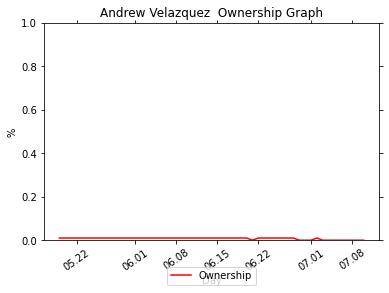

In [9]:
for player in interesting_plus:
     oc.GraphPlayer(own_df, player)
     print(player, end = ", ")

In [11]:
pit_stats = oc.stat_scraping.get_fantasy_pros_stats(player_type = 'pitchers')
dfPit = oc.pd.read_csv(data_file.format('pit', oc.date_string))   
dfPit_pre = oc.pd.read_csv(data_file.format('pit', '20220519')) 